# European Rent: The Basics

Housing costs are a necessary evil, an often very expensive necessary evil, and an issue that is pervasive across 
the globe.<br> And while rent is determined by a wide array of factors, many unrelated to the home itself, let's start 
with the most important<br> factors in determining a place to live - space and price. In addition to some regional
information, the goal is to determine if the<br> cost of living and comfort varies by country.

- Currently only looks at European countries, but may later include data from other regions
- Variables will be added and results will change overtime
- Comfort and cost are subjective and vary by individual situations - this is all general

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

SEED = 11223
PATH = "Data/"

### Germany

In [2]:
# Germany
germany = pd.read_csv(PATH + "immo_data.csv")
#germany = germany[["regio1", "balcony", "totalRent", "yearConstructed", "baseRent", "livingSpace", "geo_krs", 
                   #"condition", "typeOfFlat", "noRooms", "floor", "numberOfFloors", "lastRefurbish", "date"]]
germany.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [3]:
#germany.loc[germany.drop(columns=["serviceCharge", "pricetrend", "lastRefurbish", "date"]).duplicated() == True]
# no duplicates (removed columns that may change overtime - data over 8 month period)

In [4]:
german_regions = germany[["regio1"]]
german_regions = german_regions.value_counts()[0:5].to_frame().reset_index()["regio1"].tolist()
germany = germany.loc[germany["regio1"].isin(german_regions)]
#germany.head()

In [5]:
density = [530, 220, 189, 110, 300]
# per km^2
area_income = [43910, 35909, 53768, 34505, 50751]
# per capita in euros
# information from Wikipedia

region_info = {region:[d, i] for region, d, i in zip(german_regions, density, area_income)}
region_info = pd.DataFrame.from_dict(region_info, orient = 'index', columns = ['Population Density', 'GRP Per Capita']).reset_index()
region_info = region_info.rename(columns = {"index":"regio1"})
region_info

,regio1,Population Density,GRP Per Capita
0,Nordrhein_Westfalen,530,43910
1,Sachsen,220,35909
2,Bayern,189,53768
3,Sachsen_Anhalt,110,34505
4,Hessen,300,50751


In [6]:
germany = germany.merge(region_info)
germany = germany[["livingSpace", "baseRent", "noRooms", "Population Density", "GRP Per Capita"]]
germany.columns = ["Area", "Price", "Rooms", "Population Density", "GRP Per Capita"]
germany.head()

,Area,Price,Rooms,Population Density,GRP Per Capita
0,86.00,595.0,4.0,530,43910
1,83.80,965.0,3.0,220,35909
2,58.15,343.0,3.0,220,35909
3,62.00,310.0,2.0,220,35909
4,60.00,300.0,2.5,530,43910


<Axes: >

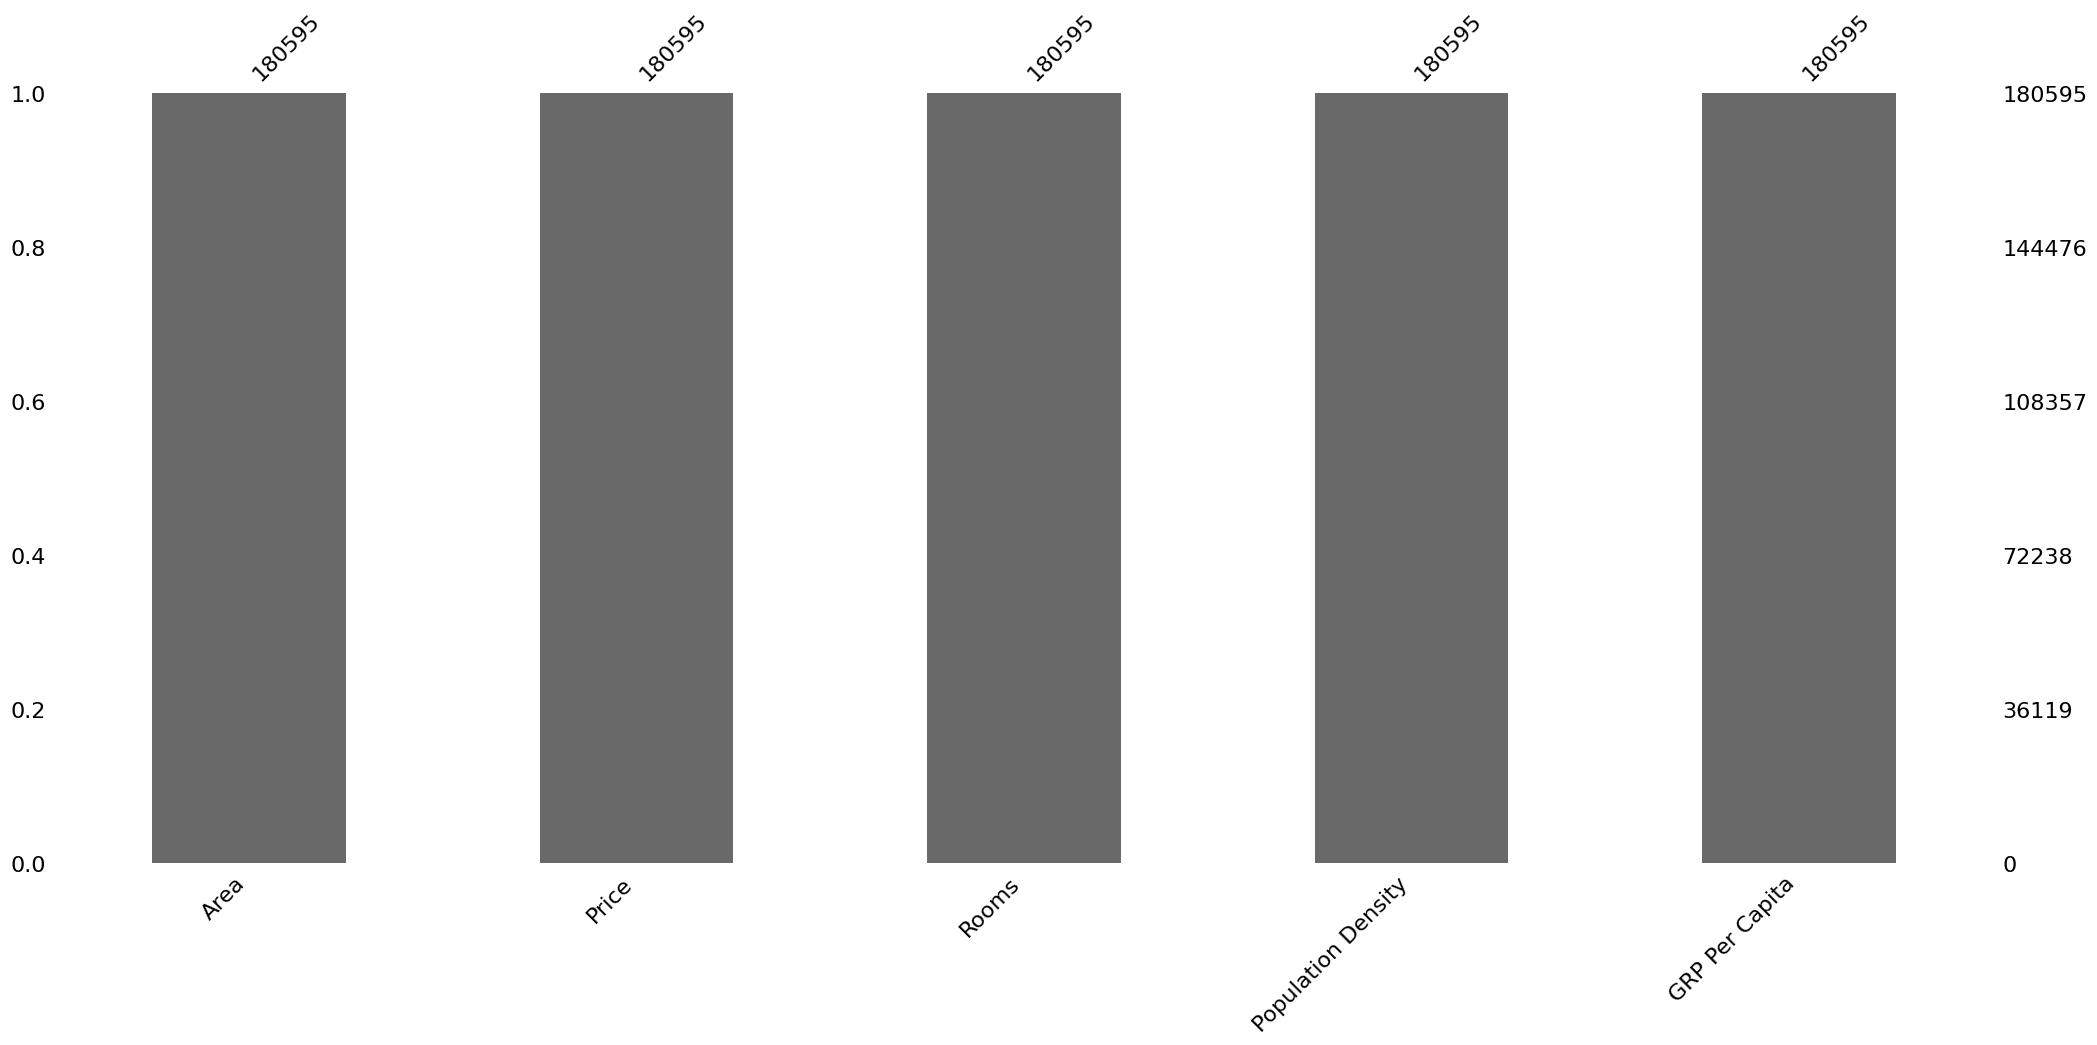

In [7]:
msno.bar(germany)

In [8]:
#germany = germany.loc[germany["Floor"] <= 20]
#germany
# most buildings 4-6 floors, and ~30 apartment units
# https://commercial-germany.com/apartment-buildings/

In [9]:
germany.dropna(inplace = True)
germany = germany.astype(int)
germany["Country"] = "Germany"
germany

,Area,Price,Rooms,Population Density,GRP Per Capita,Country
0,86,595,4,530,43910,Germany
1,83,965,3,220,35909,Germany
2,58,343,3,220,35909,Germany
3,62,310,2,220,35909,Germany
4,60,300,2,530,43910,Germany
...,...,...,...,...,...,...
180590,90,820,3,189,53768,Germany
180591,115,930,3,300,50751,Germany
180592,95,650,4,300,50751,Germany
180593,70,840,2,530,43910,Germany


### Poland

In [10]:
# Poland
poland = pd.read_csv(PATH + "apartments_rent_pl_2023_11.csv")
#poland["buildingMaterial"].value_counts(dropna=False)
#poland = poland[["squareMeters", "rooms", "floor", "floorCount", "buildYear", "poiCount", "condition", "price"]]
poland = poland.loc[poland["type"] == "apartmentBuilding"]#.reset_index(drop = True)
polish_region = poland[["city"]]
#poland["ownership"].value_counts()
poland

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
3,50d75c688530b9a61ba505301e0b94a9,szczecin,apartmentBuilding,32.6,2.0,5.0,6.0,2021.0,53.421582,14.541572,...,0.192,condominium,brick,premium,no,yes,yes,no,no,2500
4,9b187f4203adabf466fd08610d8f4e5e,szczecin,apartmentBuilding,72.0,3.0,6.0,6.0,2014.0,53.450010,14.547230,...,0.315,condominium,brick,premium,no,yes,yes,no,yes,2999
13,9d367adf87498634275de9607815173f,szczecin,apartmentBuilding,40.0,2.0,5.0,7.0,2021.0,53.404167,14.503333,...,0.210,condominium,brick,premium,yes,no,yes,no,no,3000
14,34a1ea9e2c896d5cac97fe431a3fedd1,szczecin,apartmentBuilding,26.0,1.0,6.0,7.0,2021.0,53.404167,14.503333,...,0.210,condominium,brick,premium,yes,yes,yes,no,no,2000
16,755bcd527418bdc97e6fb6b4e68a81bb,szczecin,apartmentBuilding,60.0,3.0,4.0,4.0,2021.0,53.393732,14.492816,...,0.522,condominium,brick,premium,no,no,yes,no,no,3250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,81baae9c33d036e82de1bcda7caae237,bydgoszcz,apartmentBuilding,44.0,2.0,3.0,3.0,2021.0,53.126000,18.007900,...,0.205,condominium,brick,NaN,no,yes,yes,no,no,2350
8505,4cfb33bdb78b6b19f394354ea2a9abc1,bydgoszcz,apartmentBuilding,34.0,2.0,2.0,16.0,2023.0,53.122484,18.041888,...,0.511,condominium,brick,premium,yes,yes,yes,no,no,2300
8507,f9ab4a98d3fc90bf62d85194be542367,bydgoszcz,apartmentBuilding,80.0,4.0,3.0,3.0,NaN,53.138334,18.021229,...,0.404,condominium,brick,NaN,no,yes,yes,no,no,4500
8517,a69e8a0ec5c756789ea5ff696e345655,bydgoszcz,apartmentBuilding,55.0,2.0,3.0,3.0,NaN,53.129551,18.029431,...,0.024,condominium,brick,NaN,no,no,no,no,no,3000


In [11]:
#poland.loc[poland.drop(columns=["condition", "price"]).duplicated() == True]

# no duplicates

In [12]:
polish_region.value_counts()
polish_region = polish_region.value_counts()[0:7].to_frame().reset_index()["city"].tolist()
# use 7 to retain majority of data
poland = poland.loc[poland["city"].isin(polish_region)]
poland

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
437,6c756728374e4433fe43268ceea69efc,krakow,apartmentBuilding,78.0,3.0,8.0,10.0,2021.0,50.056010,19.959362,...,0.360,condominium,brick,NaN,yes,yes,yes,no,no,6699
438,8980533a8ecfed18e24a6b21ae54183a,krakow,apartmentBuilding,46.0,2.0,3.0,4.0,2023.0,50.079945,19.923082,...,0.217,condominium,brick,premium,yes,yes,yes,yes,no,3300
439,39e1e2068072b9daddc5fef28a38875d,krakow,apartmentBuilding,60.0,3.0,2.0,2.0,NaN,50.095145,19.934692,...,0.167,condominium,brick,NaN,no,yes,no,no,no,3000
445,a198282cab7589826970a114c21d8ede,krakow,apartmentBuilding,63.0,3.0,1.0,4.0,NaN,50.069432,19.986249,...,0.474,condominium,brick,NaN,no,yes,no,no,no,4800
448,efe4ab651a41ba86ed80a5b89893c737,krakow,apartmentBuilding,40.0,2.0,2.0,3.0,2017.0,50.017700,19.964300,...,0.589,condominium,brick,NaN,no,yes,yes,yes,no,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,a92823a30fa79e74a5c80691496e7146,warszawa,apartmentBuilding,120.0,5.0,10.0,10.0,2000.0,52.239239,20.990335,...,0.105,condominium,brick,NaN,no,yes,yes,no,no,7500
8323,b5c6016c84fd8429bde397ca1d5264ab,warszawa,apartmentBuilding,64.0,2.0,2.0,5.0,NaN,52.222658,21.019832,...,0.184,condominium,brick,NaN,no,yes,yes,no,yes,8000
8324,3c1a7d55e10d7e27bb90a09a590a8f5c,warszawa,apartmentBuilding,106.0,4.0,2.0,7.0,NaN,52.188264,21.054159,...,0.298,condominium,brick,NaN,no,no,yes,no,no,6500
8325,57a94af424f052ec255dee23c739c2fb,warszawa,apartmentBuilding,90.0,3.0,1.0,8.0,NaN,52.186439,21.052592,...,0.162,condominium,brick,NaN,no,yes,yes,no,no,6500


In [13]:
density = [3601, 2461, 2302, 2245, 1800, 1780, 2063]
# per km^2
area_income = [35000, 15400, 19500, 16100, 17300, 18100, 17800]
# per capita in euros (based on avg regional GDP /capita)
# information from Wikipedia

city_info = {region:[d, i] for region, d, i in zip(polish_region, density, area_income)}
city_info = pd.DataFrame.from_dict(city_info, orient = 'index', columns = ['Population Density', 'GRP Per Capita']).reset_index()
city_info = city_info.rename(columns = {"index":"city"})
poland = poland.merge(city_info)

In [14]:
poland = poland[["squareMeters", "price", "rooms", "Population Density", "GRP Per Capita"]]
poland.columns = ["Area", "Price", "Rooms", "Population Density", "GRP Per Capita"]
poland["Price"] = poland["Price"].astype(int) * 0.22 #convert zloty to euros
poland

,Area,Price,Rooms,Population Density,GRP Per Capita
0,78.0,1473.78,3.0,2461,15400
1,46.0,726.00,2.0,2461,15400
2,60.0,660.00,3.0,2461,15400
3,63.0,1056.00,3.0,2461,15400
4,40.0,550.00,2.0,2461,15400
...,...,...,...,...,...
2594,120.0,1650.00,5.0,3601,35000
2595,64.0,1760.00,2.0,3601,35000
2596,106.0,1430.00,4.0,3601,35000
2597,90.0,1430.00,3.0,3601,35000


<Axes: >

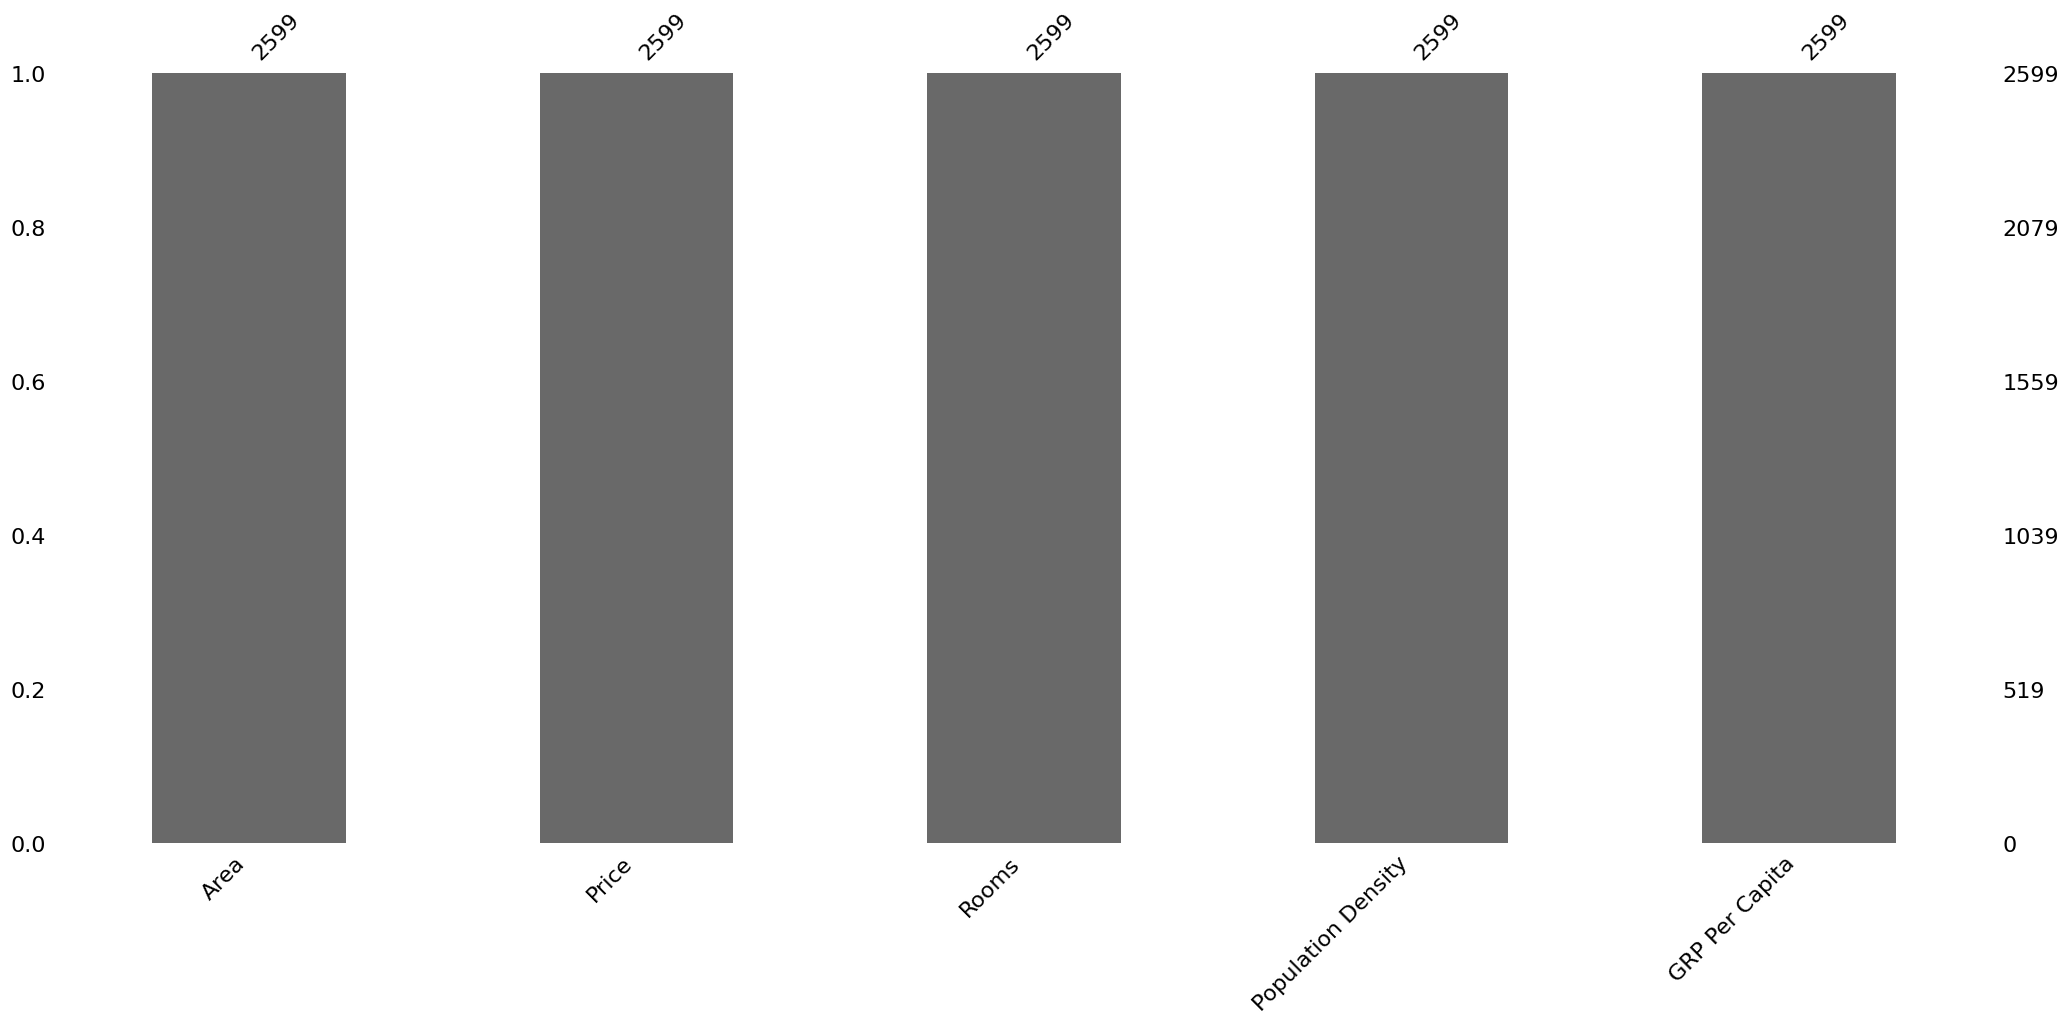

In [15]:
msno.bar(poland)

In [16]:
poland = poland.dropna().astype(int)
poland["Country"] = "Poland"
poland

,Area,Price,Rooms,Population Density,GRP Per Capita,Country
0,78,1473,3,2461,15400,Poland
1,46,726,2,2461,15400,Poland
2,60,660,3,2461,15400,Poland
3,63,1056,3,2461,15400,Poland
4,40,550,2,2461,15400,Poland
...,...,...,...,...,...,...
2594,120,1650,5,3601,35000,Poland
2595,64,1760,2,3601,35000,Poland
2596,106,1430,4,3601,35000,Poland
2597,90,1430,3,3601,35000,Poland


### Spain

In [17]:
# Spain
spain = pd.read_csv(PATH + "pisos.csv", index_col = 0)
spain

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_80052/3750616914.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  spain = pd.read_csv(PATH + "pisos.csv", index_col = 0)


,summary,description,location,photo,recomendado,price,size,rooms,price/m2,bathrooms,Num Photos,type,region
0,Casa en calle Urb. Las Mimosas,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/104/1069_I00...,Recomendado,250.000 €,315 m²,4,793 €/m²,3,31,pisos,a_coruna
1,Piso en Milladoiro,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/113/1069_I00...,Recomendado,90.000 €,72 m²,2,1.250 €/m²,1,11,pisos,a_coruna
2,Casa en calle La Piedra,NaN,A Ortigueira (Cariño),https://fotos1.imghs.net/nrd//999170/892070610...,Recomendado,50.000 €,92 m²,2,543 €/m²,1,40,pisos,a_coruna
3,Casa en Perillo,NaN,Perillo (Oleiros),https://fotos3.imghs.net/nrd/1089/198/1089_XA2...,Recomendado,359.000 €,244 m²,4,1.471 €/m²,3,39,pisos,a_coruna
4,Chalet en Urbanización Las Mimosas,NaN,O Milladoiro (Ames),https://fotos5.imghs.net/nrd/1097/754/1097_0_f...,Recomendado,200.430 €,315 m²,4,636 €/m²,3,24,pisos,a_coruna
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831430,Finca rústica en Cardedeu,Suelo urbano no consolidado de uso residencial...,Cardedeu,https://fotos4.imghs.net/nrd/1088/335/1088_727...,NaN,A consultar,4.381 m²,NaN,NaN,NaN,10,fincas_rusticas,valles_oriental_sud
831431,Finca rústica en Granollers,Solar urbano consolidado sin edificación de us...,Can Bassa-Palou (Granollers),https://fotos2.imghs.net/nrd/1088/137/1088_727...,NaN,A consultar,4.063 m²,NaN,NaN,NaN,4,fincas_rusticas,valles_oriental_sud
831432,Finca rústica en La Roca del Vallès,+finca situada al norte del municipio de la ro...,La Roca del Vallès,https://fotos3.imghs.net/nrd//1005/057/1005_60...,NaN,1.350.000 €,350 m²,5,3.857 €/m²,2.0,9,fincas_rusticas,valles_oriental_sud
831433,"Finca rústica en Bajada Les Valls, nº S/N","""Masía típica catalana, casa principal de 165 ...",La Roca del Vallès,https://fotos5.imghs.net/nrd/1098/460/1098_0_f...,NaN,456.000 €,202 m²,5,2.257 €/m²,3.0,30,fincas_rusticas,valles_oriental_sud


In [18]:
spain.loc[spain.drop(columns=["photo", "recomendado", "Num Photos"]).duplicated() == True]

# does include duplicates (reposts or posted on multiple platforms/sites?)
# dates likely between March and Nov. 2020 - published Nov 2020 and original focus on convid impact on Spain housing market

,summary,description,location,photo,recomendado,price,size,rooms,price/m2,bathrooms,Num Photos,type,region
395,Piso en calle La Guardia,NaN,Alto del Castaño (Narón),https://fotos4.imghs.net/nrd/9989/932/9989_TI-...,NaN,78.200 €,2,2,NaN,2,28,pisos,a_coruna
449,"Piso en Avenida de los Mugardos, 55",NaN,Ares,https://fotos1.imghs.net/nrd/9986/281/9986_561...,NaN,55.000 €,68 m²,2,808 €/m²,2,52,pisos,a_coruna
469,Piso en calle La Guardia,NaN,Alto del Castaño (Narón),https://fotos3.imghs.net/nrd/9989/925/9989_TI-...,NaN,78.200 €,2,2,NaN,2,40,pisos,a_coruna
606,Piso en Camino del Cemiterio,NaN,Mugardos,https://fotos3.imghs.net/nrd//1018/314/1018_11...,NaN,103.000 €,141 m²,4,730 €/m²,3,22,pisos,a_coruna
655,"Dúplex en Alameda Baño, Blo. 4",NaN,Mugardos,https://fotos5.imghs.net/nrd//4210/98427807989...,NaN,104.000 €,142 m²,4,732 €/m²,3,20,pisos,a_coruna
...,...,...,...,...,...,...,...,...,...,...,...,...,...
830801,...,Canovelles,https://fotos1.imghs.net/nrd//996907/175501556...,NaN,120.000 €,75 m²,3,1.600 €/m²,1,36.0,piso,valles_oriental_sud,NaN
830883,...,Font Verda (Granollers),https://fotos5.imghs.net/nrd//1708/891902548.1...,NaN,245.000 €,103 m²,4,2.378 €/m²,1,12.0,piso,valles_oriental_sud,NaN
831247,Piso en Canovelles,Vivienda Dúplex en la segunda planta de un edi...,Canovelles,https://fotos5.imghs.net/nrd/1088/577/1088_726...,NaN,120.000 €,96 m²,3,1.250 €/m²,1.0,29,piso,valles_oriental_sud
831255,"Apartamento en calle Rambla de Vallromanes, nº 71",En el centro de Vallromanes os presentamos est...,Vallromanes,https://fotos3.imghs.net/nrd/1093/602/1093_EP5...,NaN,225.000 €,93 m²,3,2.419 €/m²,2.0,20,piso,valles_oriental_sud


In [19]:
spain_duplicates = spain.loc[spain.drop(columns=["photo", "recomendado", "Num Photos"]).duplicated() == True].index.tolist()
spain = spain[~spain.index.isin(spain_duplicates)]

In [20]:
spain = spain.loc[spain["type"].isin(["pisos", "piso"])]
spanish_region = spain[["region"]]
spanish_region.value_counts()[0:5]
spanish_region = spanish_region.value_counts()[0:5].to_frame().reset_index()["region"].tolist()

In [21]:
spain = spain.loc[spain["region"].isin(spanish_region)]

density = [89, 3196, 2564, 2400, 660]
# per km^2
area_income = [22426, 24031, 30426, 30426, 19107]
# per capita in euros (based on avg regional GDP /capita)
# information from Wikipedia

region2_info = {region:[d, i] for region, d, i in zip(spanish_region, density, area_income)}
region2_info = pd.DataFrame.from_dict(region2_info, orient = 'index', columns = ['Population Density', 
                                                                                 'GRP Per Capita']).reset_index()
region2_info = region2_info.rename(columns = {"index":"region"})
spain = spain.merge(region2_info)

In [22]:
spain = spain[["size", "price", "rooms", "Population Density", "GRP Per Capita"]]
spain.columns = ["Area", "Price", "Rooms", "Population Density", "GRP Per Capita"]
spain

,Area,Price,Rooms,Population Density,GRP Per Capita
0,124 m²,100.000 €,3,89,22426
1,115 m²,239.000 €,2,89,22426
2,86 m²,75.000 €,3,89,22426
3,58 m²,67.000 €,2,89,22426
4,119 m²,115.000 €,3,89,22426
...,...,...,...,...,...
28104,94 m²,249.600 €,4,660,19107
28105,52 m²,97.500 €,2,660,19107
28106,76 m²,130.000 €,2,660,19107
28107,124 m²,232.000 €,3,660,19107


<Axes: >

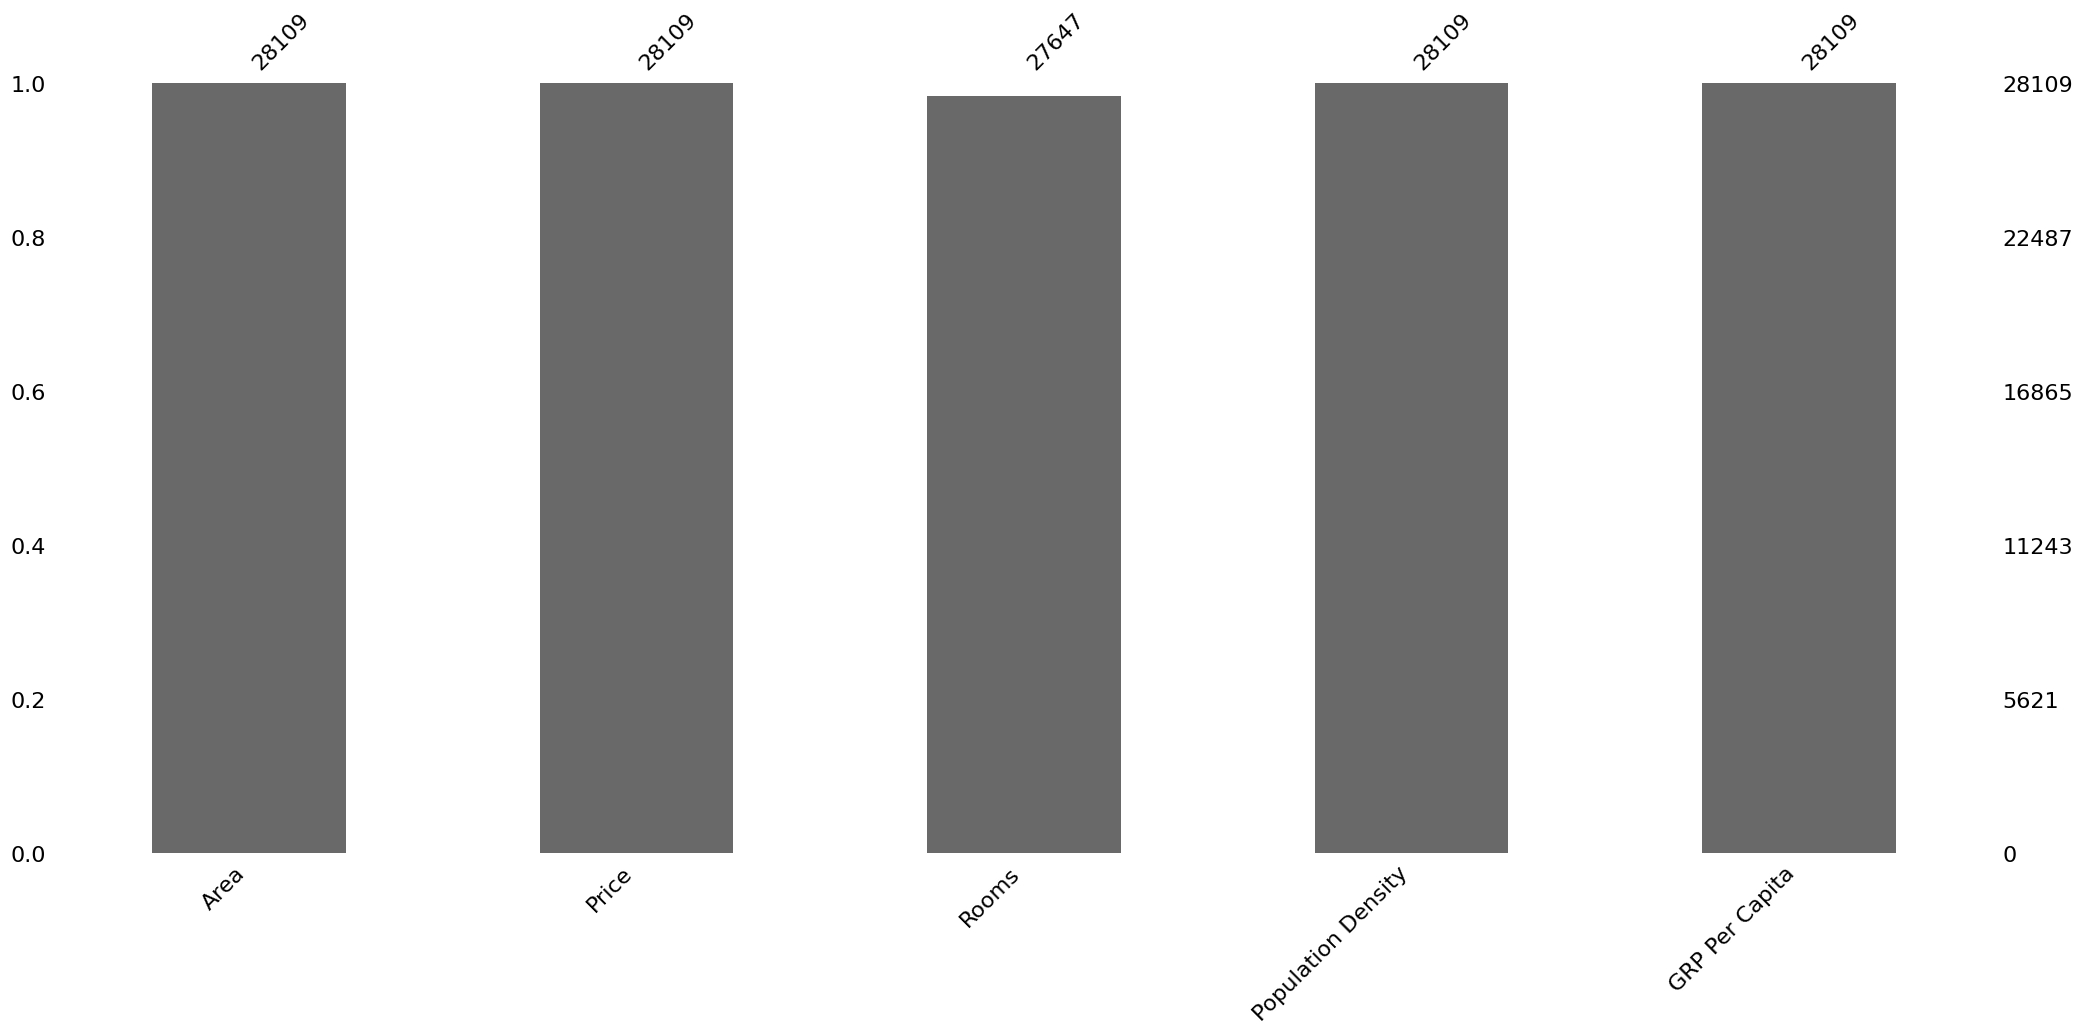

In [23]:
msno.bar(spain)

In [24]:
spain["Price"] = spain["Price"].str.extract(r'(\d+)', expand = False)
spain["Area"] = spain["Area"].str.extract(r'(\d+)', expand = False)
spain.dropna(inplace = True)
spain = spain.astype(int)
spain["Country"] = "Spain"
spain

,Area,Price,Rooms,Population Density,GRP Per Capita,Country
0,124,100,3,89,22426,Spain
1,115,239,2,89,22426,Spain
2,86,75,3,89,22426,Spain
3,58,67,2,89,22426,Spain
4,119,115,3,89,22426,Spain
...,...,...,...,...,...,...
28104,94,249,4,660,19107,Spain
28105,52,97,2,660,19107,Spain
28106,76,130,2,660,19107,Spain
28107,124,232,3,660,19107,Spain


## Finalize Dataset(s)

In [25]:
rent = pd.concat([germany, poland, spain])
rent

,Area,Price,Rooms,Population Density,GRP Per Capita,Country
0,86,595,4,530,43910,Germany
1,83,965,3,220,35909,Germany
2,58,343,3,220,35909,Germany
3,62,310,2,220,35909,Germany
4,60,300,2,530,43910,Germany
...,...,...,...,...,...,...
28104,94,249,4,660,19107,Spain
28105,52,97,2,660,19107,Spain
28106,76,130,2,660,19107,Spain
28107,124,232,3,660,19107,Spain


In [26]:
X = rent.drop(columns = "Country")
y = rent["Country"]

y.value_counts()

Country
Germany    180595
Spain       27532
Poland       2599
Name: count, dtype: int64

### Undersample Germany and Poland

In [27]:
undersamp = RandomUnderSampler(sampling_strategy = {'Germany':6000, 'Spain':5000}, random_state = SEED)
X_resample, y_resample = undersamp.fit_resample(X, y)
X_resample

,Area,Price,Rooms,Population Density,GRP Per Capita
44397,95,800,4,300,50751
42019,100,490,4,530,43910
90675,59,472,2,530,43910
173532,57,315,2,110,34505
114279,104,650,3,530,43910
...,...,...,...,...,...
5258,103,125,3,3196,24031
21634,115,139,3,2564,30426
12282,132,412,5,660,19107
14315,82,60,2,89,22426


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.25, random_state = SEED)

In [29]:
#X_train.to_csv(PATH + "X_train.csv")
#X_test.to_csv(PATH + "X_test.csv")
#y_train.to_csv(PATH + "y_train.csv")
#y_test.to_csv(PATH + "y_test.csv")
#rent.to_csv(PATH + "rent.csv")

## End Notes

- Spain lacking year constructed info (interesting column but cannot impute)
- Add vacancies in region? (avg monthly vacancies by time data collected over)